# Included in this Notebook
1. Importing Libraries and Data
2. Cleaning Data
3. Data Prep for Regression Analysis
4. Regression Analysis
5. Thoughts on Model Performance


## Importing Libraries and Data

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# To ensure the graphs I create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define Path
path = r'C:\Users\seann\Downloads\Career Foundry Tasks\World Happiness Analysis'

In [4]:
# Import Data
wh_combined = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'world_happiness_updated.csv'), index_col = False)

## Cleaning Data

In [5]:
wh_combined.columns

Index(['Unnamed: 0', 'Overall Rank', 'Country', 'Happiness Score',
       'GDP per Capita', 'Social Support', 'Health', 'Freedom', 'Generosity',
       'Perception of Corruption', 'Year'],
      dtype='object')

In [6]:
wh_combined.head()

,Unnamed: 0,Overall Rank,Country,Happiness Score,GDP per Capita,Social Support,Health,Freedom,Generosity,Perception of Corruption,Year
0,0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [7]:
# Dropping unnamed:0 column
wh_combined = wh_combined.drop(columns = ['Unnamed: 0'])

In [8]:
wh_combined.columns

Index(['Overall Rank', 'Country', 'Happiness Score', 'GDP per Capita',
       'Social Support', 'Health', 'Freedom', 'Generosity',
       'Perception of Corruption', 'Year'],
      dtype='object')

In [9]:
wh_combined.shape

(782, 10)

In [11]:
# Checcking for missing values
wh_combined.isnull().sum()

Overall Rank                0
Country                     0
Happiness Score             0
GDP per Capita              0
Social Support              0
Health                      0
Freedom                     0
Generosity                  0
Perception of Corruption    0
Year                        0
dtype: int64

In [12]:
# Checking for duplicate values
dups = wh_combined.duplicated()

In [13]:
dups

0      False
1      False
2      False
3      False
4      False
       ...  
777    False
778    False
779    False
780    False
781    False
Length: 782, dtype: bool

In [14]:
dups.shape

(782,)

In [15]:
wh_combined.describe()

,Overall Rank,Happiness Score,GDP per Capita,Social Support,Health,Freedom,Generosity,Perception of Corruption,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.218576,0.125436,2016.993606
std,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.122321,0.105749,1.417364
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.130000,0.054250,2016.000000
50%,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.201982,0.091033,2017.000000
75%,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.278832,0.155861,2018.000000
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.838075,0.551910,2019.000000


## Data Prep for Regression Analysis

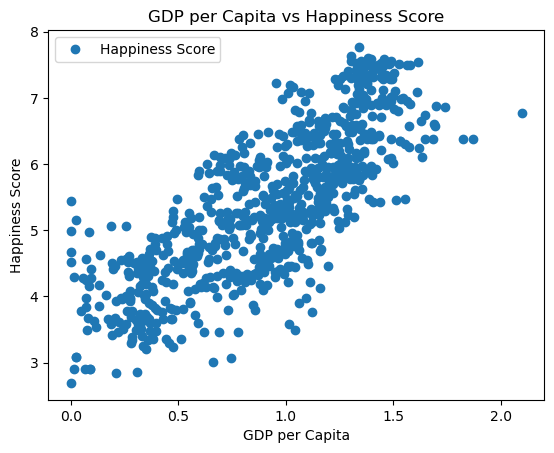

In [17]:
# Creating a scatterplot  for another look at how the chosen variables plot against each other.

wh_combined.plot(x = 'GDP per Capita', y='Happiness Score',style='o')
plt.title('GDP per Capita vs Happiness Score')  
plt.xlabel('GDP per Capita')  
plt.ylabel('Happiness Score')  
plt.show()

If the GDP per Capita is high in a country then the Happiness Score for that country will be higher.

In [19]:
# Reshaping the variables into NumPy arrays and putting them into separate objects.

X = wh_combined['GDP per Capita'].values.reshape(-1,1)
y = wh_combined['Happiness Score'].values.reshape(-1,1)

In [20]:
X

array([[1.39651   ],
       [1.30232   ],
       [1.32548   ],
       [1.459     ],
       [1.32629   ],
       [1.29025   ],
       [1.32944   ],
       [1.33171   ],
       [1.25018   ],
       [1.33358   ],
       [1.22857   ],
       [0.95578   ],
       [1.33723   ],
       [1.02054   ],
       [1.39451   ],
       [0.98124   ],
       [1.56391   ],
       [1.33596   ],
       [1.30782   ],
       [1.42727   ],
       [1.26637   ],
       [1.36011   ],
       [1.04424   ],
       [1.52186   ],
       [1.06353   ],
       [1.32792   ],
       [1.10715   ],
       [1.69042   ],
       [1.27778   ],
       [1.05351   ],
       [1.17898   ],
       [1.06166   ],
       [0.91861   ],
       [0.9669    ],
       [1.39541   ],
       [1.23011   ],
       [1.2074    ],
       [1.29098   ],
       [1.55422   ],
       [0.99534   ],
       [1.21183   ],
       [0.76454   ],
       [0.74553   ],
       [0.63244   ],
       [1.16891   ],
       [1.27074   ],
       [1.24461   ],
       [0.864

In [21]:
y

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

In [22]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression Analysis

In [23]:
# Create a regression object.

regression = LinearRegression()  

In [24]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

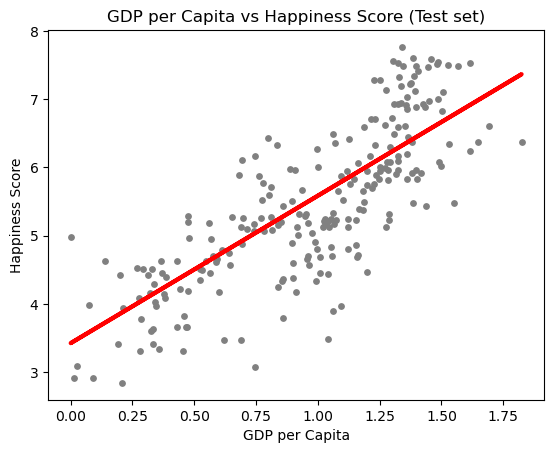

In [26]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per Capita vs Happiness Score (Test set)')
plot_test.xlabel('GDP per Capita')
plot_test.ylabel('Happiness Score')
plot_test.show()

Looking at the plot and plot, I can see that the regression line covers many data points, however there are many exceptions or points that are not covered. Though there is definitely a positive relationship between the two variables, there may be other factors at work as some points with the same GDP seem to chart at different points on their Happiness Scores.

In [27]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [29]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.16337475]]
Mean squared error:  0.5039507249325367
R2 score:  0.6165274246667813


In [30]:
y_predicted

array([[5.80609125],
       [6.44687622],
       [6.73379067],
       [6.43932604],
       [4.03947279],
       [5.92522839],
       [4.25537759],
       [5.02417608],
       [6.50613105],
       [5.98930082],
       [5.71924675],
       [5.94263683],
       [4.19912985],
       [5.39980284],
       [3.45557795],
       [6.36354302],
       [4.45263517],
       [5.37080656],
       [5.84749161],
       [5.27800314],
       [7.36905798],
       [3.58040467],
       [4.66425542],
       [6.36899473],
       [7.07949027],
       [6.39062848],
       [6.08126589],
       [6.4144256 ],
       [4.3550776 ],
       [6.35601448],
       [6.98988328],
       [6.53341121],
       [5.90436673],
       [3.83568289],
       [6.39928197],
       [5.60748681],
       [3.47872606],
       [5.6798517 ],
       [6.21586115],
       [6.04412074],
       [4.13691119],
       [6.44053022],
       [5.0341925 ],
       [5.71777566],
       [6.29976674],
       [6.12708616],
       [5.98175065],
       [5.179

In [31]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.525,5.806091
1,6.886,6.446876
2,6.344,6.733791
3,7.119,6.439326
4,3.781,4.039473
5,4.692,5.925228
6,4.390,4.255378
7,5.061,5.024176
8,6.929,6.506131
9,5.488,5.989301


## Model Performance Thoughts

The model performed pretty well on the test, though it could have fit it slightly better. When comparing the actual and predicted variables of y, the model did well. When looking at the summary statistics the model did well, except for the R2 score where it score around 62%. This percent is a bit low. I think overall this shows that my hypothesis is true overall, however there are many other factors influencing the happiness score which causes some variance in the data.